In [1]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import pandas as pd
import time
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from project_utils import *

In [2]:
snrs_df = pd.read_csv('supernova_remnants.tsv',sep=';')
snrs_df

,SNR,RAJ2000,DEJ2000,MajDiam,MinDiam,u_MinDiam,type,l_S(1GHz),S(1GHz),u_S(1GHz),Sp-Index,u_Sp-Index,Names,Simbad,recno
0,G000.0+00.0,17 45 44,-29 00,3.5,2.5,,S,,100.0,?,0.80,?,Sgr A East,Simbad,1
1,G000.3+00.0,17 46 15,-28 38,15.0,8.0,,S,,22.0,,0.60,,,Simbad,2
2,G000.9+00.1,17 47 21,-28 09,8.0,,,C,,18.0,?,,v,,Simbad,3
3,G001.0-00.1,17 48 30,-28 09,8.0,,,S,,15.0,,0.60,?,,Simbad,4
4,G001.4-00.1,17 49 39,-27 46,10.0,,,S,,2.0,?,,?,,Simbad,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,G358.5-00.9,17 46 10,-30 40,17.0,,,S,,4.0,?,,?,,Simbad,306
306,G359.0-00.9,17 46 50,-30 16,23.0,,,S,,23.0,,0.50,,,Simbad,307
307,G359.1-00.5,17 45 30,-29 57,24.0,,,S,,14.0,,0.40,?,,Simbad,308
308,G359.1+00.9,17 39 36,-29 11,12.0,11.0,,S,,2.0,?,,?,,Simbad,309


In [3]:
full_list = True
if full_list:
    snrs_df = pd.read_csv('supernova_remnants.tsv',sep=';')

    # Convert coordinates to decimal degrees
    data = []
    for name, ra, dec,ang_size in zip(snrs_df['SNR'].values, snrs_df['RAJ2000'].values, snrs_df['DEJ2000'].values,snrs_df['MajDiam'].values):
        coord = SkyCoord(ra, dec, unit=(u.hourangle, u.deg))
        data.append([name, coord.ra.deg, coord.dec.deg,ang_size])

    # Create a Pandas DataFrame
    df = pd.DataFrame(data, columns=["Object", "RA", "Dec","Ang_size"])

    # Save the DataFrame to a CSV file
    df.to_csv("snrs.csv", index=False)
    df.loc[:,'radius'] = 1.*df.loc[:,'Ang_size']
    df.loc[:,'pm_thresh'] = 20

In [4]:
small_list = False
if small_list:
    # List of objects and their coordinates in sexagesimal format
    objects = [
        ("SNR 0509-67.5", "05h 09m 31s", "-67° 31′ 18″"),
        ("DEM L71", "05h 05m 42s", "-62° 52′ 39″"),
        ("Lambda Orionis Ring", "05h 35m 18.0s", "+09° 56′ 00″"),
        ("SNR 0534-69.9", "05h 33m 59.00s", "-69° 55′ 00″"),
        ("Sagittarius A East", "17h 45m 41s", "-29° 00′ 48″"),
        ("SNR J050555-680150","05h 05m 55s", "-68° 01′ 47″"),
    ]

    # Convert coordinates to decimal degrees
    data = []
    for name, ra, dec in objects:
        coord = SkyCoord(ra, dec, unit=(u.hourangle, u.deg))
        data.append([name, coord.ra.deg, coord.dec.deg])

    # Create a Pandas DataFrame
    df = pd.DataFrame(data, columns=["Object", "RA", "Dec"])

    df.loc[:,'radius'] = 10
    df.loc[:,'pm_thresh'] = 20

In [5]:
df

,Object,RA,Dec,Ang_size,radius,pm_thresh
0,G000.0+00.0,266.433333,-29.000000,3.5,3.5,20
1,G000.3+00.0,266.562500,-28.633333,15.0,15.0,20
2,G000.9+00.1,266.837500,-28.150000,8.0,8.0,20
3,G001.0-00.1,267.125000,-28.150000,8.0,8.0,20
4,G001.4-00.1,267.412500,-27.766667,10.0,10.0,20
...,...,...,...,...,...,...
305,G358.5-00.9,266.541667,-30.666667,17.0,17.0,20
306,G359.0-00.9,266.708333,-30.266667,23.0,23.0,20
307,G359.1-00.5,266.375000,-29.950000,24.0,24.0,20
308,G359.1+00.9,264.900000,-29.183333,12.0,12.0,20


In [6]:
# Get the distances to SNRs
df = make_distance_table(df,load=True)


In [7]:
df.to_csv("objects.csv", index=False)

In [8]:
# # Construct ADQL query to get the stars with proper motion > pm_thresh
# query = f"""
# SELECT source_id, ra, dec, parallax,parallax_error, pmra, pmdec, 
#         pm, phot_g_mean_mag, radial_velocity
# FROM gaiadr3.gaia_source
# WHERE 1=CONTAINS(POINT('ICRS', ra, dec), 
#                     CIRCLE('ICRS', {23}, {41}, {2/60}))
#                 AND parallax_over_error > 20
#                 AND phot_bp_mean_flux_over_error >=5
#                 AND phot_rp_mean_flux_over_error >=5
#                 AND 1000/parallax < 1200
#                 AND 1000/parallax > 800

# """
# print("Querying Gaia Archive... This may take a few seconds.")
# job = Gaia.launch_job_async(query)
# results = job.get_results()

# # Convert to Pandas DataFrame
# df = results.to_pandas()

# df

In [27]:
def make_catalogue(df,load=False,max_retries=2):
    if load:
        df_new = pd.read_csv("gaia_snrs_catalogue.csv")

    else:
        q_out = []

        for i in range(0, len(df)):
            print(f"Querying object {df['Object'].values[i]}")
            try:
                q = query_gaia_high_pm_stars(ra=df['RA'].values[i],
                                            dec=df['Dec'].values[i],
                                                radius=df['radius'].values[i], 
                                                distance=df["Distance_kpc"].values[i])
                
                #Append if q is not empty
                if len(q) > 0:
                    q["Object"] = df["Object"].values[i]
                    q["SNR_dist"] = df["Distance_kpc"].values[i]
                    q_out.append(q)
                    if i == 0:
                        df_new = q
                    else:         
                        df_new = pd.concat(q_out, ignore_index=True)
                            

                    df_new.to_csv("gaia_snrs_catalogue.csv", index=False)
                else:
                    print("query return empty df")
            except Exception as e:
                    print(f"Failed to query object {df['Object'].values[i]} at index {i}")
                    print(f"Error: {e}")  # Print the actual error message
                    continue


    return df_new,q_out 

test_df = pd.read_csv('g064.csv')

# test_df = test_df[test_df["RA"] > 225]

df_new,dfs = make_catalogue(test_df[0:20],load=False)


Querying object G006.4-00.1
Searching for stars within 72.0 arcminutes of (270.12499999999994, -23.433333333333334)... between 4680.0 and 2520.0 parsecs
Querying Gaia Archive... This may take a few seconds.
INFO: Query finished. [astroquery.utils.tap.core]


In [33]:
test_df

,Object,RA,Dec,Ang_size,radius,pm_thresh,SNR_Name,Distance_Info,Distance_kpc
0,G006.4-00.1,270.125,-23.433333,48.0,72.0,20,G6.4-0.1,"H I observations suggest 1.9 kpc, optical exti...",3.6


In [28]:
df_new

,source_id,ra,dec,parallax,parallax_error,pmra,pmdec,pm,phot_g_mean_mag,radial_velocity,Object,SNR_dist
0,4069213197763344384,271.033782,-23.027839,0.326844,0.014659,-0.247186,-0.465493,0.527053,13.102416,6.616887,G006.4-00.1,3.6
1,4069213300842309760,271.038535,-23.013688,0.337369,0.014894,-0.286499,-1.425306,1.453815,12.543108,NaN,G006.4-00.1,3.6
2,4069213751835151104,270.326694,-23.587783,0.382339,0.017938,0.861292,-0.504747,0.998296,13.345034,NaN,G006.4-00.1,3.6
3,4069214262915843456,270.360520,-23.557974,0.381836,0.015784,-0.475197,-1.661597,1.728212,12.475165,NaN,G006.4-00.1,3.6
4,4069214297275598592,270.372264,-23.548926,0.368213,0.018314,-0.423984,-1.741072,1.791952,12.612207,NaN,G006.4-00.1,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...
112,4069636887697123712,271.025429,-22.917772,0.356524,0.015265,-0.203649,-1.273512,1.289692,12.643102,NaN,G006.4-00.1,3.6
113,4069637128215374080,271.028496,-22.888774,0.349717,0.016222,-0.159382,-3.015649,3.019858,13.195901,15.123019,G006.4-00.1,3.6
114,4069584218535166592,271.180079,-23.068610,0.375058,0.017095,0.339001,0.498844,0.603131,13.502203,-11.546866,G006.4-00.1,3.6
115,4069657988896748416,270.797313,-22.701727,0.361564,0.017958,0.054245,-1.053429,1.054824,13.948812,NaN,G006.4-00.1,3.6


In [29]:
# Convert parallax to pm from mas/yr to km/s
df_new["dist_pc"] = 1e3 / df_new["parallax"]
df_new["pm_km_s"] = df_new["pm"] * 4.74 * df_new["dist_pc"]

In [30]:
df_new

,source_id,ra,dec,parallax,parallax_error,pmra,pmdec,pm,phot_g_mean_mag,radial_velocity,Object,SNR_dist,dist_pc,pm_km_s
0,4069213197763344384,271.033782,-23.027839,0.326844,0.014659,-0.247186,-0.465493,0.527053,13.102416,6.616887,G006.4-00.1,3.6,3059.565661,7643.497931
1,4069213300842309760,271.038535,-23.013688,0.337369,0.014894,-0.286499,-1.425306,1.453815,12.543108,NaN,G006.4-00.1,3.6,2964.115259,20425.967811
2,4069213751835151104,270.326694,-23.587783,0.382339,0.017938,0.861292,-0.504747,0.998296,13.345034,NaN,G006.4-00.1,3.6,2615.482415,12376.256678
3,4069214262915843456,270.360520,-23.557974,0.381836,0.015784,-0.475197,-1.661597,1.728212,12.475165,NaN,G006.4-00.1,3.6,2618.928205,21453.539066
4,4069214297275598592,270.372264,-23.548926,0.368213,0.018314,-0.423984,-1.741072,1.791952,12.612207,NaN,G006.4-00.1,3.6,2715.820631,23067.780168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,4069636887697123712,271.025429,-22.917772,0.356524,0.015265,-0.203649,-1.273512,1.289692,12.643102,NaN,G006.4-00.1,3.6,2804.858031,17146.490122
113,4069637128215374080,271.028496,-22.888774,0.349717,0.016222,-0.159382,-3.015649,3.019858,13.195901,15.123019,G006.4-00.1,3.6,2859.458003,40930.644913
114,4069584218535166592,271.180079,-23.068610,0.375058,0.017095,0.339001,0.498844,0.603131,13.502203,-11.546866,G006.4-00.1,3.6,2666.251898,7622.387546
115,4069657988896748416,270.797313,-22.701727,0.361564,0.017958,0.054245,-1.053429,1.054824,13.948812,NaN,G006.4-00.1,3.6,2765.761328,13828.441327


In [31]:
def plot_pm_vs_radial_velocity(df_new,median_dist=None): 
   # Make a scatter plot of the radial velocity vs. the proper motion, color-coded by object names
   plt.figure(figsize=(10, 6))

   sns.scatterplot(data=df_new, x='dist_pc', y='pm',hue='Object', palette='tab10', s=30,alpha=0.6)

   # Axvline at median distance
   if median_dist:
      plt.axvline(median_dist, color='r', linestyle='--', label='Median Distance')
      
   plt.ylabel("Proper motion (km/s)", fontsize=18)
   plt.xlabel("Distance [pc]", fontsize=18)
   plt.grid(linestyle='--', alpha=0.5)
   plt.title("Proper motion vs. radial velocity", fontsize=20)
   plt.xticks(fontsize=18)
   plt.yticks(fontsize=18)
   plt.show()

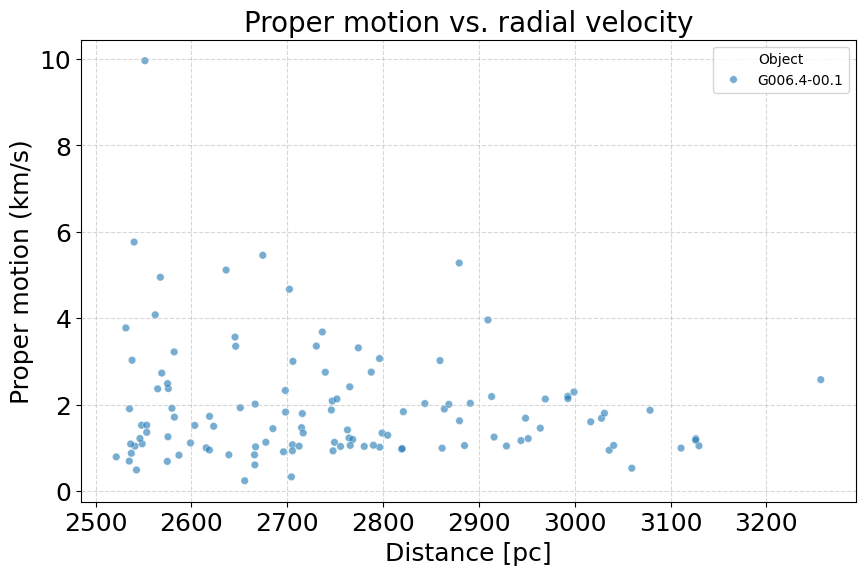

In [ ]:
plot_pm_vs_radial_velocity(df_new)

In [18]:
df_new[df_new["pm_km_s"] > 250000]["source_id"]

547    4069187672792189696
Name: source_id, dtype: int64

In [21]:
dfs[0]

,source_id,ra,dec,parallax,parallax_error,pmra,pmdec,pm,phot_g_mean_mag,radial_velocity,Object,SNR_dist,pm_km_s
0,4066040282083231488,270.788818,-24.189899,0.324817,0.015199,0.230667,-1.854065,1.868359,11.626863,-14.190552,G005.4-01.2,4.3,8856.020508


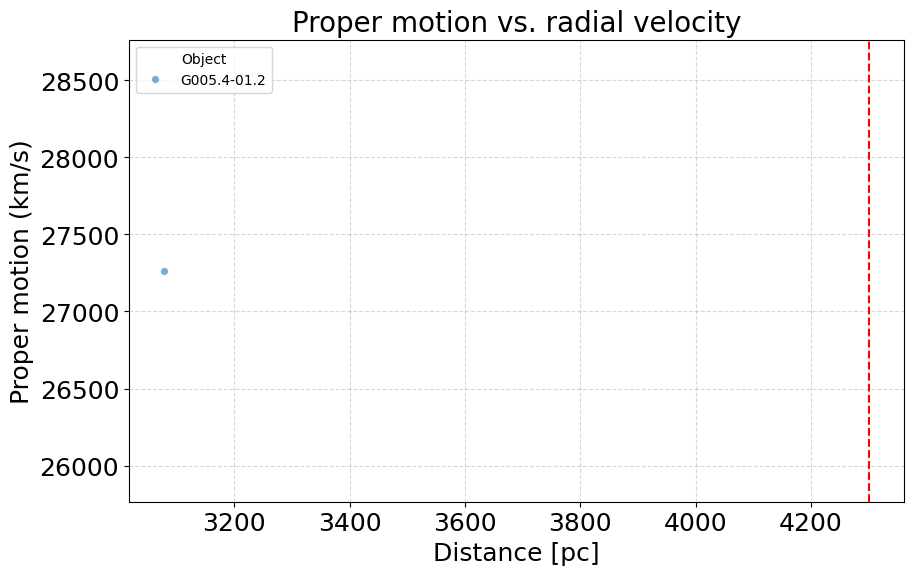

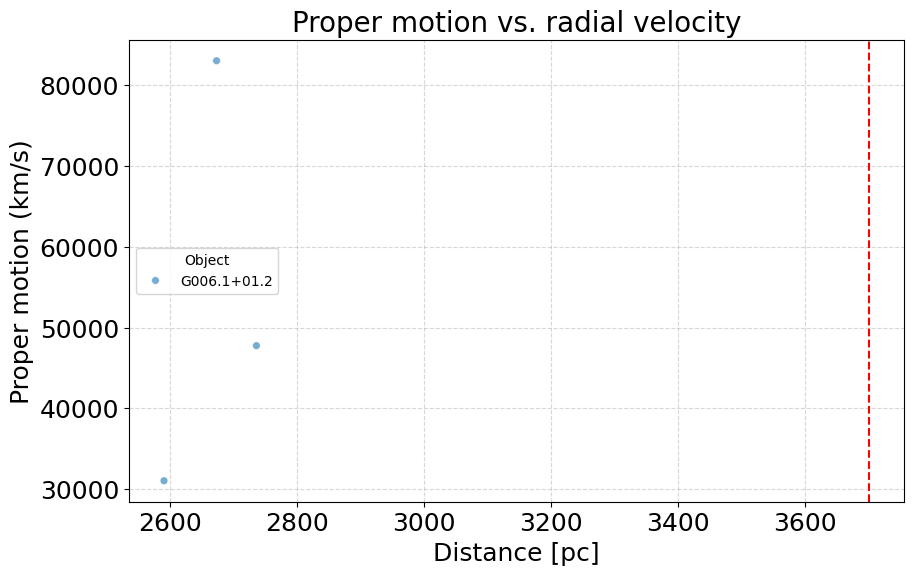

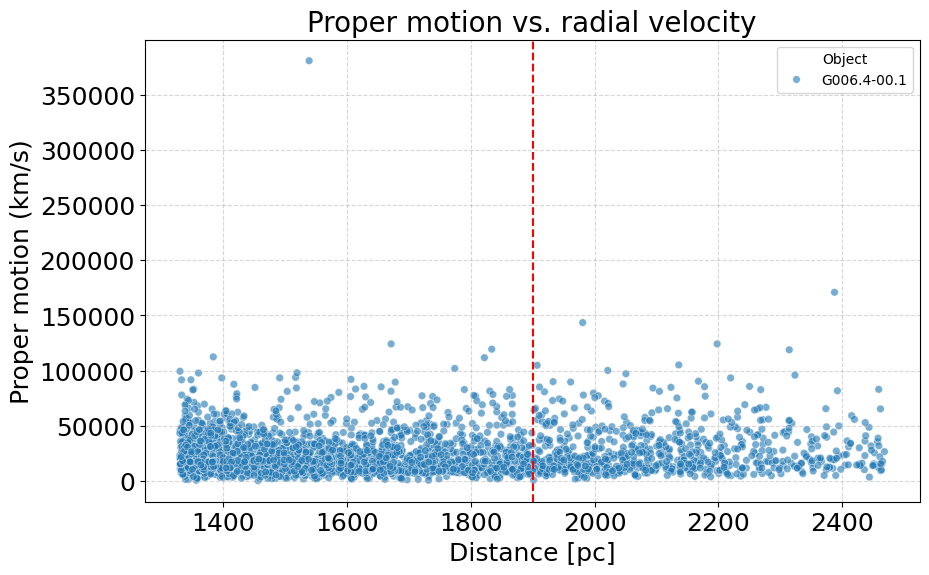

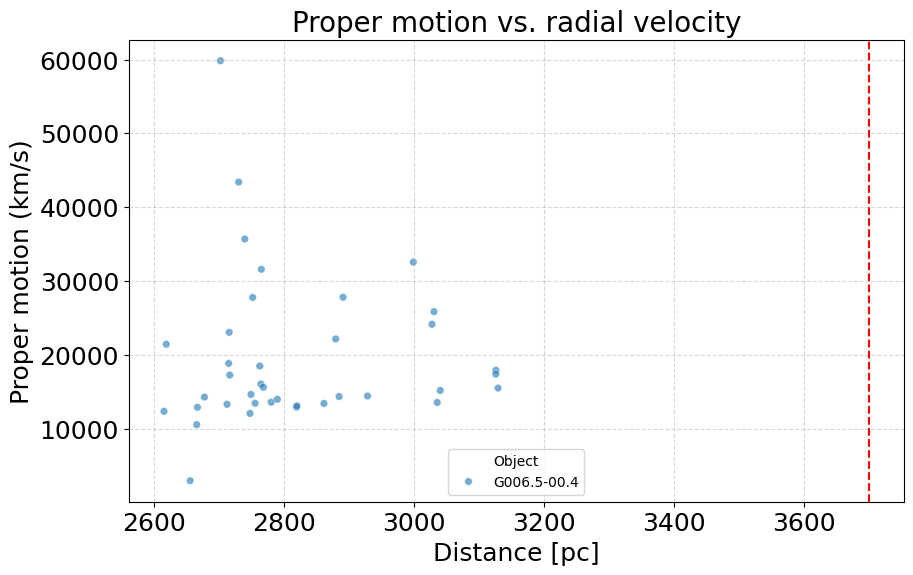

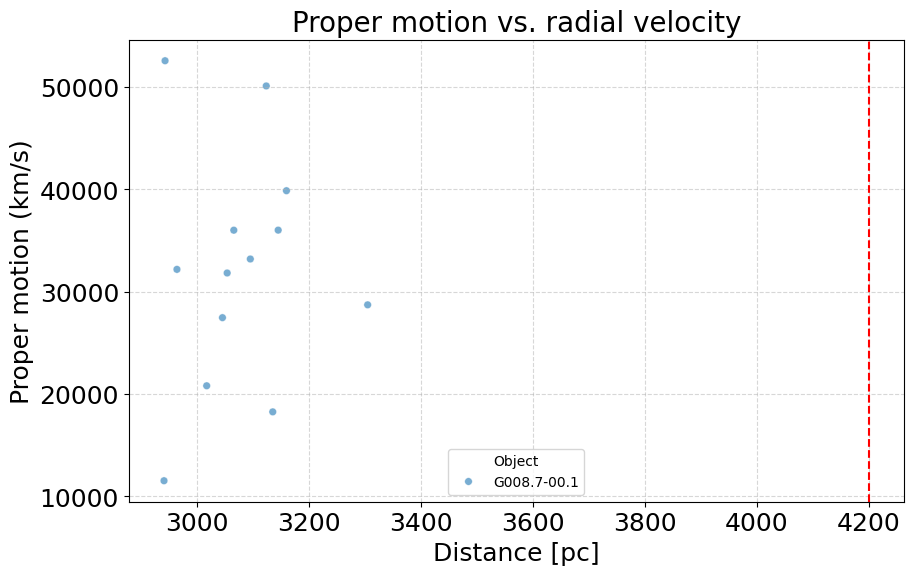

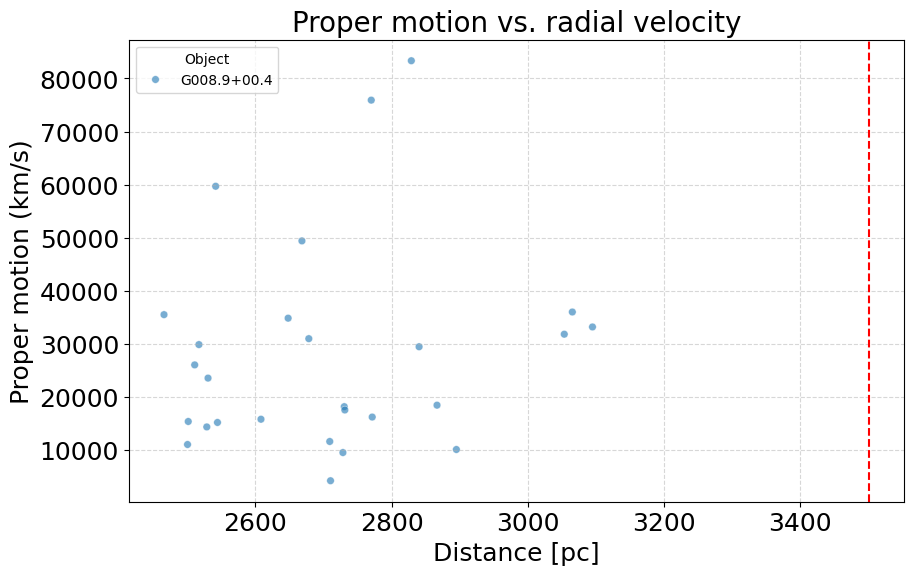

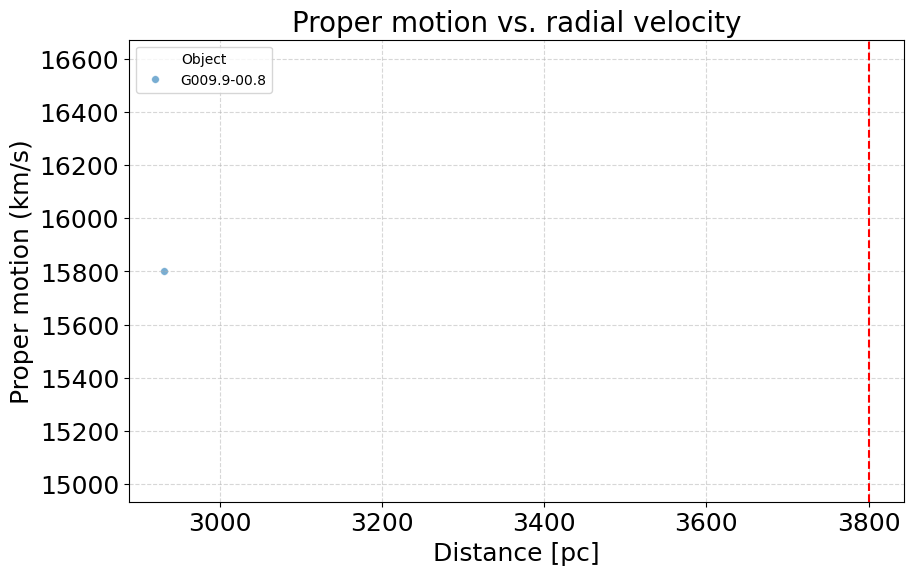

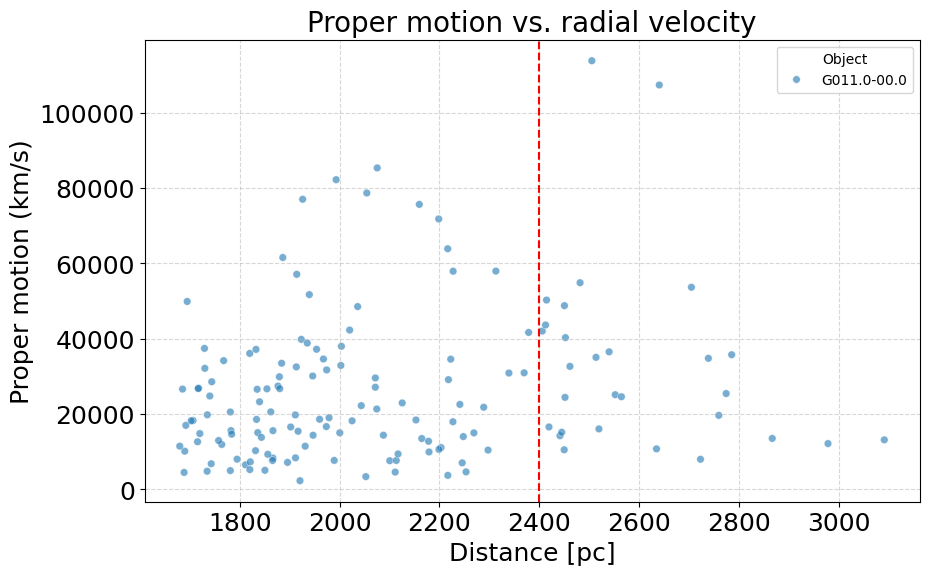

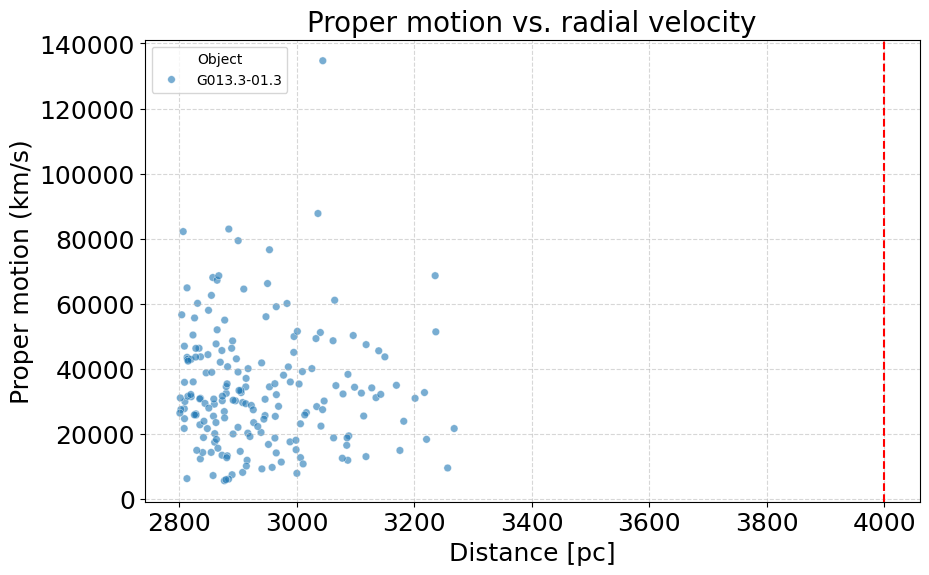

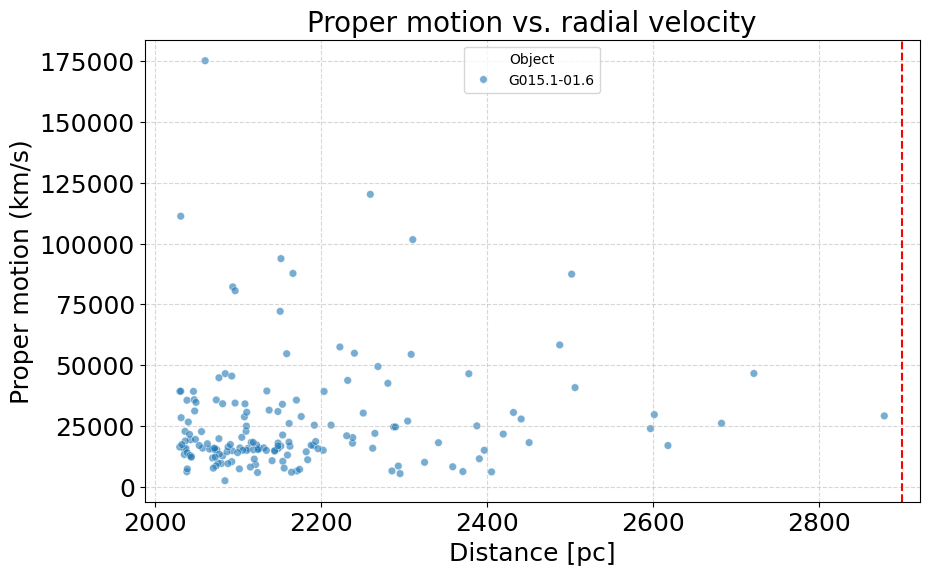

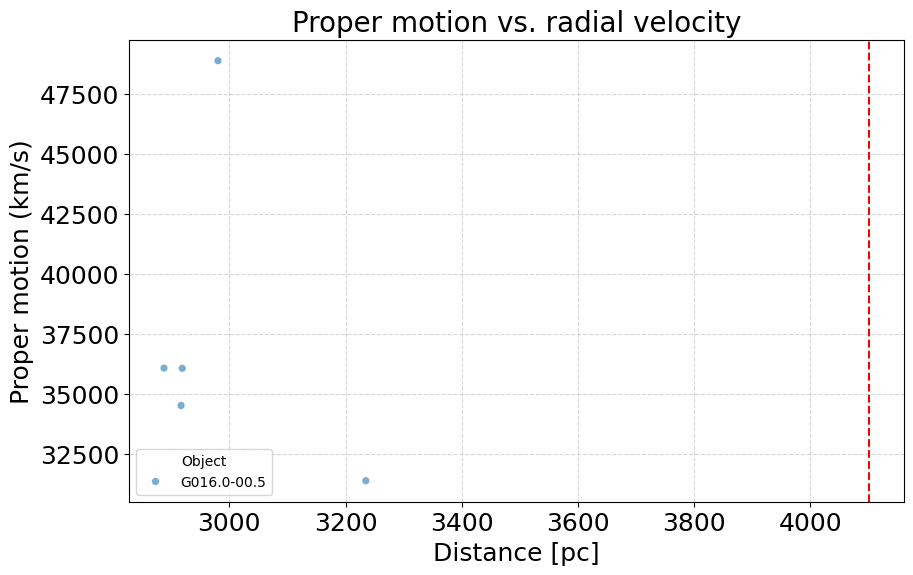

In [24]:
for df in dfs:
    # Convert parallax to pm from mas/yr to km/s
    df["dist_pc"] = 1e3 / df["parallax"]
    df["pm_km_s"] = df["pm"] * 4.74 * df["dist_pc"]
    plot_pm_vs_radial_velocity(df,median_dist=1000*df["SNR_dist"].values[0])

In [ ]:
test = df_new[df_new['pm'] > 1750]

plot_pm_vs_radial_velocity(test)

In [ ]:
test

In [ ]:
# # Make a error plot of the parallax vs. the proper motion, color-coded by object names
# plt.figure(figsize=(10, 6))

# # Plot the error bars in parallax
# sns.scatterplot(data=df_new, x='pm', y='parallax', hue='Object', palette='viridis', s=50,alpha=0.75)
# plt.errorbar(df_new['pm'], df_new['parallax'], yerr=df_new['parallax_error'], fmt='o', markersize=0, color='black')

# plt.xlabel("Proper motion (mas/yr)", fontsize=18)
# plt.ylabel("Parallax (mas)", fontsize=18)
# plt.grid(linestyle='--', alpha=0.5)
# plt.title("Proper motion vs. parallax", fontsize=20)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
# plt.legend(title='Object',fontsize=18, title_fontsize=18)
# plt.show()